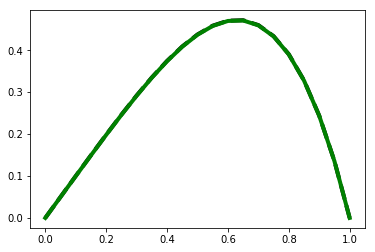

In [4]:
import math, sys
import numpy as np
from scipy.sparse import spdiags, linalg
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from scipy.fftpack import fft, ifft

## Lattice ##

Np    =  21    #len(num_str)   # z-axis points
L     =  1.0
R     =  np.linspace(0, L, num=Np)
a     =  R[1] - R[0] # Ang
funct =  12.0*R**2
exact =  R*(1.0-R**3)

phi = np.zeros(Np)

## Relaxation ##

omega = 1.5
H = 1./(Np-1)
for j in range(401):
    for i in range(1, Np-1):
        phip = (phi[i-1] + phi[i+1] + (H**2)*funct[i])/2.0
        phi[i] = (1.0-omega)*phi[i] + omega*phip
    E = 0.
    for k in range(1, Np):
        E = E + ((((phi[k]-phi[k-1]))/H)**2)/2.
        E = E -(H**2)*funct[k]*phi[k] / (H**2)
    E = E*H
    if np.sqrt((-0.06286 - E)**2) < 4e-3:
        print('iter =', j, 'energy = ', E)
        
## Visualization ##

plt.plot(R, exact, color='black', linestyle='--', linewidth=4)
plt.plot(R, phi, color='green', linewidth=4)
plt.show()